In [1]:
# Let's import necessary libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Initializing the Dataframe
df=pd.read_csv("heart_disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Checking the stats
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
#let's check the counts of each class
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
#Checking the misssing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Outlier detection (applies to Continuous data only)
df_features = df[['age','trestbps','chol','thalach','oldpeak']]


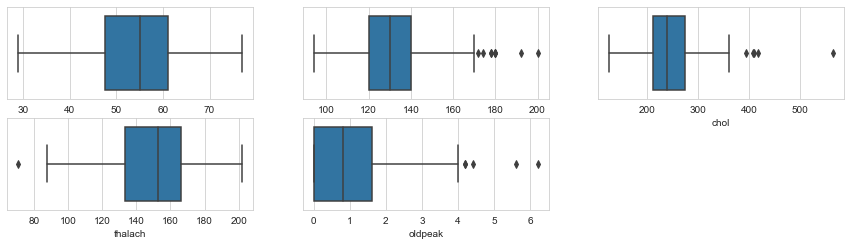

In [7]:
# Checking the outliers by using boxplot
plt.figure(figsize=(15,20))
graph=1
for column in df_features:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df_features[column],orient='h')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()    

## OBSERVATIONS:

#### 1. Age = that is the 1st box, there is no outliers
#### 2. Trestbps = that is the 2nd box, it has outliers in the higher side
#### 3. Chol = that is the 3rd box , it has outliers in the higher side
#### 4. Thalach = that is the 4th box , it has outliers in the lower side
#### 5. Oldpeak = that is the 5th box, it has outliers in the higher side

In [8]:
# Finding out IQR (inter quantile range) to identify outliers
#1st quantile
q1 = df.quantile(0.25)
 
#3rd quantile
q3 = df.quantile(0.75)
    
#IQR
iqr= q3-q1


### Out line detection Formula
### Higher side ===> Q3+(1.5 * IQR)
### Lower side ===> Q1-(1.5 * IQR)

In [9]:
#Validating one outlier using formula
out_trestbps= (q3.trestbps+(1.5*iqr.trestbps))
out_trestbps

170.0

In [10]:
# Outlier removal higher side
index=np.where(df['trestbps']>out_trestbps)
index

(array([  8, 101, 110, 203, 223, 241, 248, 260, 266], dtype=int64),)

In [11]:
df=df.drop(df.index[index])

In [12]:
df.shape

(294, 14)

In [13]:
df.reset_index()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
290,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
291,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
292,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [14]:
#Outlier removal of other features
index=np.where(df['chol']>(q3.chol+(1.5*iqr.chol)))
df=df.drop(df.index[index])
print('shape',df.shape)
df.reset_index()

shape (289, 14)


,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
285,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
286,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
287,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [15]:
index=np.where(df['thalach']<(q1.thalach-(1.5*iqr.thalach)))
df=df.drop(df.index[index])
print('shape',df.shape)
df.reset_index()

shape (288, 14)


,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
284,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
285,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
286,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [16]:
index=np.where(df['oldpeak']>(q3.oldpeak+(1.5*iqr.oldpeak)))
df=df.drop(df.index[index])
print('shape',df.shape)
df.reset_index()

shape (284, 14)


,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
280,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
281,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
282,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [17]:
#Just find correlation of feature vs target using corrwith
df.drop('target',axis=1).corrwith(df.target)

age        -0.226382
sex        -0.316165
cp          0.418107
trestbps   -0.113745
chol       -0.109764
fbs        -0.028433
restecg     0.173856
thalach     0.424381
exang      -0.432780
oldpeak    -0.435748
slope       0.328483
ca         -0.379219
thal       -0.350042
dtype: float64

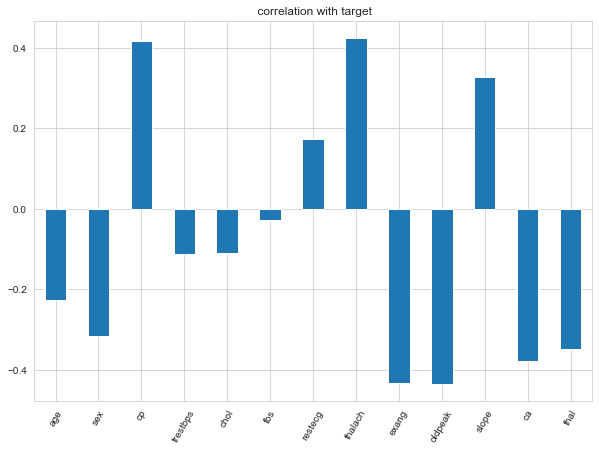

In [18]:
#visualize the correlation
df.drop('target',axis=1).corrwith(df.target).plot(kind='bar',grid=True,figsize=(10,7),rot=60,
                                                 title=' correlation with target')
plt.show()

#### Let's play with the featurevselection and see if that can help us building better model.

In [19]:
# Model building using SelectPercentile features.
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

In [20]:
#Instantiate SelectPercentile and fit(feature, target)
x=df.drop(['target'],axis=1)
y=df.target
SPercentile=SelectPercentile(score_func=chi2,percentile=80)
SPercentile=SPercentile.fit(x,y)

In [21]:
#Separate the features to check p-values
cols=SPercentile.get_support(indices=True)
features=x.columns[cols]

In [22]:
df_scores=pd.DataFrame({'features':x.columns,'chi2score':SPercentile.scores_,'pvalue':SPercentile.pvalues_})
df_scores.sort_values(by='chi2score',ascending=False)

,features,chi2score,pvalue
7,thalach,174.926967,6.210909e-40
9,oldpeak,59.647601,1.134575e-14
11,ca,57.856931,2.818919e-14
2,cp,53.175100,3.051018e-13
8,exang,36.335902,1.660762e-09
4,chol,28.210526,1.088112e-07
0,age,22.546732,2.050932e-06
1,sex,8.496624,3.558061e-03
10,slope,7.667870,5.621279e-03
3,trestbps,6.656481,9.879584e-03


### The null hypothesis is - there is no relation between Feature & Target, But here the feature & label has relation. so, we reject the null hypothesis.

In [23]:
# Let's print 80% features
print(cols)
print(features)

[ 0  1  2  3  4  7  8  9 10 11]
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca'],
      dtype='object')


In [24]:
#create subset of selected features
x= df[features]
y=df.target

##### after arranging all the good features in a dataframe its time to standadize

In [25]:
#importing libs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=42)

### Gradient Boosting Classifier

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [27]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)
pred=gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")
      
#####################TestScore##########################   
      
pred=gbdt_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n")      
      


=======================Train Result===========================
Accuracy score:100.00%
_______________________________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    96.0  117.0       1.0      213.0         213.0
________________________________________________________________
 Confusion Matrix:
[[ 96   0]
 [  0 117]]


=======================Train Result===========================
Accuracy score:76.06%
_______________________________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.687500   0.820513  0.760563   0.754006      0.766184
recall      0.758621   0.761905  0.760563   0.760263      0.760563
f1-score    0.721311   0.790123  0.760563   0.755717  

In [28]:
# Let's imporove the score by Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
grid_param={
    "max_depth":range(4,12,2),
    "learning_rate":np.arange(0.1,1,0.1),
    "min_samples_split":range(4,8,2)}

In [29]:
grid = GridSearchCV(gbdt_clf,param_grid = grid_param)
grid.fit(x_train,y_train)
grid.best_params_

{'learning_rate': 0.30000000000000004, 'max_depth': 4, 'min_samples_split': 4}

In [30]:
gbdt_clf = GradientBoostingClassifier(max_depth=4,min_samples_split=4,learning_rate=0.3)
gbdt_clf.fit(x_train,y_train)
pred=gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")
      
#####################TestScore##########################   
      
pred=gbdt_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n")      
      


=======================Train Result===========================
Accuracy score:100.00%
_______________________________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    96.0  117.0       1.0      213.0         213.0
________________________________________________________________
 Confusion Matrix:
[[ 96   0]
 [  0 117]]


=======================Train Result===========================
Accuracy score:73.24%
_______________________________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.647059   0.810811  0.732394   0.728935      0.743926
recall      0.758621   0.714286  0.732394   0.736453      0.732394
f1-score    0.698413   0.759494  0.732394   0.728953  

### Let's plot ROC AUC curve to choose best model:-


In [31]:
# plot ROC/AUC for multiple models without hyperparameter tuning.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn. metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [32]:
lr= LogisticRegression()
dt= DecisionTreeClassifier()
rf= RandomForestClassifier()
kn= KNeighborsClassifier()
gb= GradientBoostingClassifier()

In [33]:
# training with all classifier
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)
gb.fit(x_train,y_train)
print('All models are Trained')

All models are Trained


In [34]:
lr.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)
kn.score(x_test,y_test)
gb.score(x_test,y_test)
print("All models' Test score captured")


All models' Test score captured


In [35]:
# Let's find ROC AUC score of different models
# Random forest classifier
roc_auc_score(y_test,rf.predict(x_test))

0.7959770114942528

In [36]:
# Logistic Regression
roc_auc_score(y_test,lr.predict(x_test))

0.772167487684729

In [37]:
# Decision Tree Classifier
roc_auc_score(y_test,dt.predict(x_test))

0.7245484400656814

In [38]:
# K-Neighbors Classifier
roc_auc_score(y_test,kn.predict(x_test))

0.7959770114942528

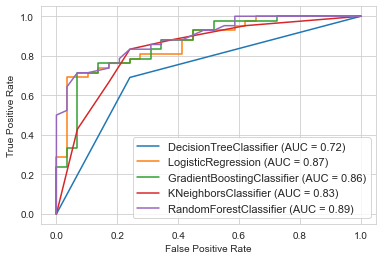

In [39]:
# Let's check ROC AUC curve for fitted models
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

In [40]:
#model prediction using RandomForest
x_predict = list(rf.predict(x_test))
df_new = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(df_new))

     predicted_values  orignal_values
10                  1               1
270                 1               0
163                 1               1
217                 0               0
77                  1               1
..                ...             ...
16                  1               1
11                  1               1
106                 0               1
39                  1               1
17                  1               1

[71 rows x 2 columns]


In [41]:
import joblib
joblib.dump(rf,'rf_file.obj')

# SAVING THE MODEL 

['rf_file.obj']

In [42]:
rf_from_joblib=joblib.load('rf_file.obj')
rf_from_joblib.predict(x_test)

#TESTING THE SAVED MODEL

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1], dtype=int64)

#### As RandomForest gives me best result for this perticular dataset. I'm saving the RF only.